# Cat and Dog Classification

Dataset: https://www.kaggle.com/erkamk/cat-and-dog-images-dataset

Libraries

In [62]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, Model, callbacks

from sklearn.metrics import confusion_matrix, classification_report

Path

In [35]:
image_dir = Path('CatAndDog\Dog and Cat .png')

In [40]:
image_dir

WindowsPath('CatAndDog/Dog and Cat .png')

In [43]:
file_path = list(image_dir.glob(r'**/*.png')) #READ from Any Folder / Any Image in png
print(file_path)
# Paths of all Cats and Dog Images

[WindowsPath('CatAndDog/Dog and Cat .png/Cat/1.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/10.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/100.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/101.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/102.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/103.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/104.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/105.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/106.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/107.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/108.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/109.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/11.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/110.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/111.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/112.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/113.png'), WindowsPath('CatAndDog/Dog and Cat .png/Cat/114.png'), WindowsPath('

In [44]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))
labels
# All Images Labels as per Folder's Name

['Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',


In [47]:
file_path = pd.Series(file_path, name='File_path').astype(str)
print(file_path)
# ALl file paths in pandas series

0        CatAndDog\Dog and Cat .png\Cat\1.png
1       CatAndDog\Dog and Cat .png\Cat\10.png
2      CatAndDog\Dog and Cat .png\Cat\100.png
3      CatAndDog\Dog and Cat .png\Cat\101.png
4      CatAndDog\Dog and Cat .png\Cat\102.png
                        ...                  
994    CatAndDog\Dog and Cat .png\Dog\g95.png
995    CatAndDog\Dog and Cat .png\Dog\g96.png
996    CatAndDog\Dog and Cat .png\Dog\g97.png
997    CatAndDog\Dog and Cat .png\Dog\g98.png
998    CatAndDog\Dog and Cat .png\Dog\g99.png
Name: File_path, Length: 999, dtype: object


In [49]:
labels = pd.Series(labels, name='Label')
print(labels)
# ALl Images labels in pandas series

0      Cat
1      Cat
2      Cat
3      Cat
4      Cat
      ... 
994    Dog
995    Dog
996    Dog
997    Dog
998    Dog
Name: Label, Length: 999, dtype: object


In [51]:
image_df = pd.concat([file_path, labels], axis=1)
image_df
# Dataframe of Image's Labels and paths

,File_path,Label
0,CatAndDog\Dog and Cat .png\Cat\1.png,Cat
1,CatAndDog\Dog and Cat .png\Cat\10.png,Cat
2,CatAndDog\Dog and Cat .png\Cat\100.png,Cat
3,CatAndDog\Dog and Cat .png\Cat\101.png,Cat
4,CatAndDog\Dog and Cat .png\Cat\102.png,Cat
...,...,...
994,CatAndDog\Dog and Cat .png\Dog\g95.png,Dog
995,CatAndDog\Dog and Cat .png\Dog\g96.png,Dog
996,CatAndDog\Dog and Cat .png\Dog\g97.png,Dog
997,CatAndDog\Dog and Cat .png\Dog\g98.png,Dog


In [52]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

# Train Dataset

In [53]:
train_df

,File_path,Label
730,CatAndDog\Dog and Cat .png\Dog\d307.png,Dog
669,CatAndDog\Dog and Cat .png\Dog\d252.png,Dog
639,CatAndDog\Dog and Cat .png\Dog\d225.png,Dog
803,CatAndDog\Dog and Cat .png\Dog\d373.png,Dog
736,CatAndDog\Dog and Cat .png\Dog\d312.png,Dog
...,...,...
767,CatAndDog\Dog and Cat .png\Dog\d340.png,Dog
72,CatAndDog\Dog and Cat .png\Cat\164.png,Cat
908,CatAndDog\Dog and Cat .png\Dog\g17.png,Dog
235,CatAndDog\Dog and Cat .png\Cat\311.png,Cat


# Test Dataset

In [55]:
test_df

,File_path,Label
507,CatAndDog\Dog and Cat .png\Dog\d106.png,Dog
608,CatAndDog\Dog and Cat .png\Dog\d198.png,Dog
452,CatAndDog\Dog and Cat .png\Cat\t57.png,Cat
368,CatAndDog\Dog and Cat .png\Cat\71.png,Cat
242,CatAndDog\Dog and Cat .png\Cat\318.png,Cat
...,...,...
459,CatAndDog\Dog and Cat .png\Cat\t63.png,Cat
415,CatAndDog\Dog and Cat .png\Cat\t23.png,Cat
61,CatAndDog\Dog and Cat .png\Cat\154.png,Cat
347,CatAndDog\Dog and Cat .png\Cat\52.png,Cat


# Loading Image Dataset

In [70]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [71]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_path',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_path',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='File_path',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 560 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


# Training

In [83]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/10
18/18 [==============================] - 22s 1s/step - loss: 0.6928 - accuracy: 0.5089 - val_loss: 0.6925 - val_accuracy: 0.5036
Epoch 2/10
18/18 [==============================] - 20s 1s/step - loss: 0.6920 - accuracy: 0.5036 - val_loss: 0.6918 - val_accuracy: 0.5612
Epoch 3/10
18/18 [==============================] - 20s 1s/step - loss: 0.6881 - accuracy: 0.5625 - val_loss: 0.6909 - val_accuracy: 0.5396
Epoch 4/10
18/18 [==============================] - 21s 1s/step - loss: 0.6808 - accuracy: 0.5661 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 5/10
18/18 [==============================] - 22s 1s/step - loss: 0.6765 - accuracy: 0.5786 - val_loss: 0.6883 - val_accuracy: 0.5396
Epoch 6/10
18/18 [==============================] - 21s 1s/step - loss: 0.6762 - accuracy: 0.5661 - val_loss: 0.7227 - val_accuracy: 0.5108
Epoch 7/10
18/18 [==============================] - 21s 1s/step - loss: 0.6920 - accuracy: 0.5286 - val_loss: 0.6912 - val_accuracy: 0.5252
Epoch 8/10
18/18 [==

# Testing

In [86]:
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
global_average_pooling2d_14  (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               422

In [84]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.71992
Test Accuracy: 55.67%


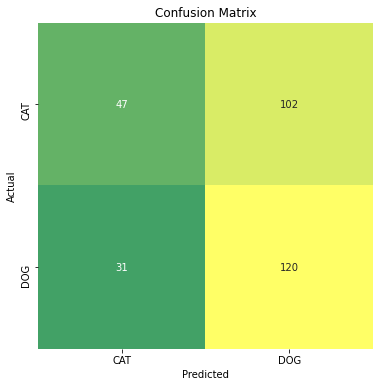

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.60      0.32      0.41       149
         DOG       0.54      0.79      0.64       151

    accuracy                           0.56       300
   macro avg       0.57      0.56      0.53       300
weighted avg       0.57      0.56      0.53       300



In [85]:
predictions = (model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='summer', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

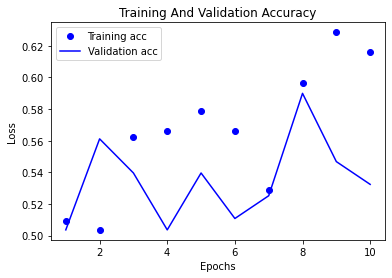

In [88]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

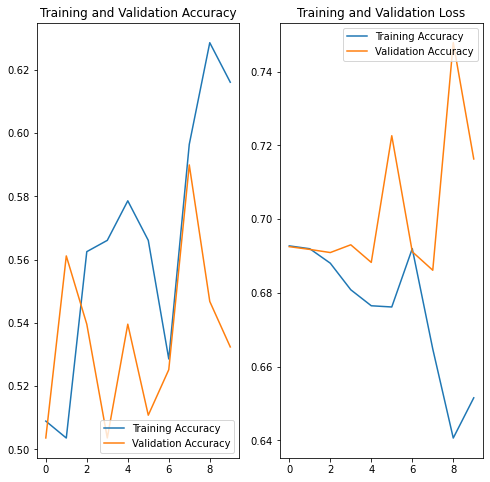

In [90]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10), loss, label='Training Accuracy')
plt.plot(range(10), val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [92]:
model.save("CatAndDog\cat_dog.h5")

In [116]:
import tkinter
from tkinter import *
from PIL import ImageTk, Image
from tkinter.ttk import *
import time
import random
from tkinter import colorchooser, filedialog, messagebox
from tkinter import filedialog as fd
import PIL.ImageGrab as ImageGrab
import os
#after
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

window = Tk()
image_path = 'nothing'


def upload(strr):
    display_result.config(text=strr)
    global image_path, img_label
    filename = fd.askopenfilename()
    image_path = filename
    # Getting image
    my_pic = Image.open(image_path)
    # Resizing Image
    global resized
    resized = my_pic.resize((224, 224), Image.ANTIALIAS)
    # Displaying image
    new_pic = ImageTk.PhotoImage(resized)
    img_label = tkinter.Label(image=new_pic, bg='black')
    img_label.image = new_pic
    img_label.place(relx=0.7, rely=0.4, anchor=CENTER)


def predict(pat,strr):
    global acc, acc2, result
    if (pat == 'nothing'):
        display_result.config(text='Please Upload image...')
    else:
        # Prepering image data
        img = load_img(pat, target_size=(224, 224))
        # convert to array
        img = img_to_array(img)
        # reshape into a single sample with 3 channels
        img = img.reshape(1, 224, 224, 3)
        # center pixel data
        img = img.astype('float32')
        # Load Trained Model
        model = models.load_model('cat_dog.h5')
        # Predicting image
        result = model.predict(img)
        time.sleep(1)  # Some time to predict
        acc = (result[0][0]) *100
        acc2 = random.randint(90, 96)
        # Prediction Condition
        if (result[0][0] <= 0.5):
            display_result.config(text=strr + 'Cat Detected', fg='#000000')
            print("Cat exists")
        
        else:
            display_result.config(text=strr + 'Dog Detected', fg='#000000')
            print('Dog found')
            


def clear(strr):
    
    if strr == 'clear it':
            img_label.destroy()
            display_result.destroy()
            
    
            

window.title('Cat or Dog')
window.geometry("700x500+500+100")
window.rowconfigure(0, weight=1)
window.columnconfigure(0, weight=1)

lb1 = tkinter.Label(text="Cat or Dog ?", bg="#A2A2A2", fg='#FFFFFF', relief="solid",
                    height=1, font="Arial 18 bold italic", anchor=CENTER)
lb1.pack(side=TOP, fill=BOTH)

lb2 = tkinter.Label(text="Capture", font="Arial 20 bold italic", anchor=CENTER)
lb2.place(relx=0.3, rely=0.2, anchor=CENTER)






result_value = ''
display_result = tkinter.Label(text="Prediction here"+result_value, bg="#A2A2A2", fg='#FFFFFF', relief="solid" ,
          height=2, font="Arial 18 bold italic", anchor=CENTER)
display_result.pack(side=BOTTOM,fill=X)

#Examine
predict_button = tkinter.Button(text="Predict", bg='#E32446', fg='#FFFFFF', width=10,
                                font=("Arial", 15, "bold"),
                                relief="solid", command=lambda: predict(image_path,"Result: "))
predict_button.place(relx=0.3, rely=0.8, anchor=CENTER)

#Select Image
upload_button = tkinter.Button(text='Select Image', bg='#FBBF21', width=10,
                               font=("Arial", 15, "bold"),
                               relief="solid", command=lambda:upload("Prediction here: "))
upload_button.place(relx=0.3, rely=0.7, anchor=CENTER)

#Clear
predict_button = tkinter.Button(text="Clear", bg='#1CA5B8', fg='#FFFFFF', width=10,
                                font=("Arial", 15, "bold"), command=lambda: clear("clear it"),
                                relief="solid")
predict_button.place(relx=0.7, rely=0.8, anchor=CENTER)


window.mainloop()